<a href="https://colab.research.google.com/github/apanand/UChicago-MSADS/blob/main/Spotify%20Recommender/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from numpy import argmax
import pandas as pd
from collections import Counter
from datetime import datetime
import os
import itertools
import math
import collections
import json

# Plotting
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt


# SkLearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import class_weight

# Tensorflow Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files

uploaded = files.upload()

Saving listening_history.csv to listening_history.csv
Saving billboard_features_df.csv to billboard_features_df.csv


In [3]:
billboard_features_df = pd.read_csv('billboard_features_df.csv')

In [4]:
features_df = pd.read_csv('listening_history.csv')

# Exploratory Data Analysis

In [5]:
features_df

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,597vP6rhNkEpSHpCyriFnf,Flyin Baby,JACK MARLOW,39,2023-04-21,0.826,0.576,9,-10.317,0,0.0165,0.747000,0.1340,0.670,129.980,192000,4
1,3cEvwcgCxyMKIKFp37LGwS,Soundboy Surrender - Crossy Remix - Mixed,"Kartoon, Crossy",55,2022-07-22,0.530,0.856,10,-2.220,0,0.0176,0.351000,0.2450,0.718,87.513,61714,4
2,5cGZN0P1QnSfhCFBCHtp2N,Peach,"salute, Sammy Virji",55,2023-03-31,0.866,0.668,1,-7.472,1,0.0115,0.889000,0.2380,0.657,135.009,345311,4
3,4wP6mzWZC94dYmU6OYeljf,Maria Maria,TECH IT DEEP,69,2023-02-08,0.723,0.685,0,-6.790,1,0.0992,0.000601,0.2440,0.386,127.987,161802,4
4,51oib6a2dRu2f6x8OMMphQ,Réveiller (feat. manon),"Shaolin Cowboy, manon",52,2021-03-26,0.842,0.418,8,-9.602,0,0.7650,0.022800,0.1170,0.448,128.009,289787,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,4UBIs1W680L7JR7oqkx3zq,OOPS,"m$sha, Jay Critch",42,2023-03-17,0.790,0.652,3,-6.882,0,0.0325,0.000041,0.0769,0.253,140.399,117447,4
8096,4uSsR7XGqmC4F8ngY65I2M,"Paper Thick (feat. E-40, Casual & Del the Funk...","CALIsthenics, E-40, Casual, Del The Funky Homo...",32,2024-03-29,0.770,0.770,11,-6.348,0,0.0177,0.005410,0.3220,0.261,104.105,124824,4
8097,3AwQtBfYQgDLfMnQ8ZNkEt,Go To Work,Chris Mula,66,2023-10-17,0.509,0.540,9,-13.219,1,0.5210,0.000000,0.4570,0.152,67.770,116286,4
8098,2rMFawCg4BW65jzbwztXAV,Oh My Dis Side (feat. Quavo),"Travis Scott, Quavo",66,2015-09-04,0.459,0.623,1,-4.450,1,0.3520,0.000000,0.1310,0.205,126.014,351253,4


In [6]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8100 non-null   object 
 1   title             8100 non-null   object 
 2   all_artists       8100 non-null   object 
 3   popularity        8100 non-null   int64  
 4   release_date      8100 non-null   object 
 5   danceability      8100 non-null   float64
 6   energy            8100 non-null   float64
 7   key               8100 non-null   int64  
 8   loudness          8100 non-null   float64
 9   mode              8100 non-null   int64  
 10  acousticness      8100 non-null   float64
 11  instrumentalness  8100 non-null   float64
 12  liveness          8100 non-null   float64
 13  valence           8100 non-null   float64
 14  tempo             8100 non-null   float64
 15  duration_ms       8100 non-null   int64  
 16  time_signature    8100 non-null   int64  


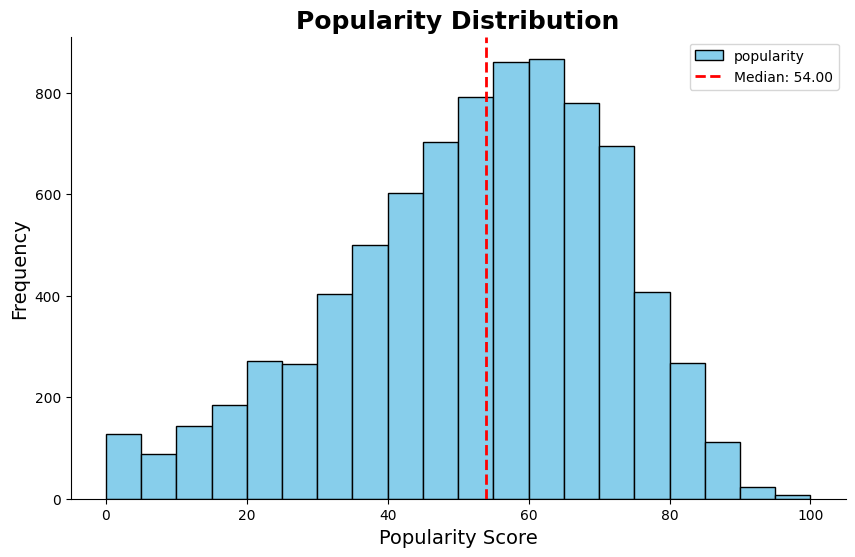

In [8]:
import matplotlib.pyplot as plt

median_popularity = features_df['popularity'].median()

plt.figure(figsize=(10, 6))
features_df['popularity'].plot(
    kind='hist',
    bins=20,
    color='skyblue',
    edgecolor='black'
)

plt.title('Popularity Distribution', fontsize=18, weight = 'bold')
plt.xlabel('Popularity Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axvline(x=median_popularity, color='red', linestyle='--', linewidth=2, label=f'Median: {median_popularity:.2f}')
plt.legend()
plt.show()


In [9]:
features_df['popularity'].median()

54.0

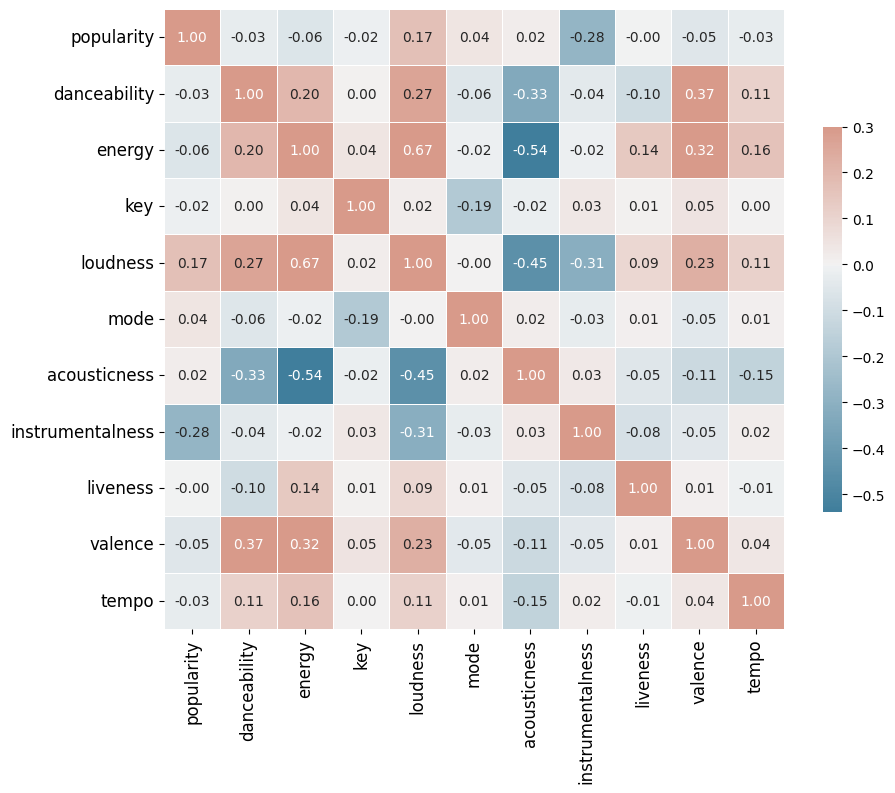

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_df = features_df.select_dtypes(include=['float64', 'int64'])

feature_columns = [
    'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo'
]
corr_matrix = features_df[feature_columns].corr()
plt.figure(figsize=(10, 10))

cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(corr_matrix, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


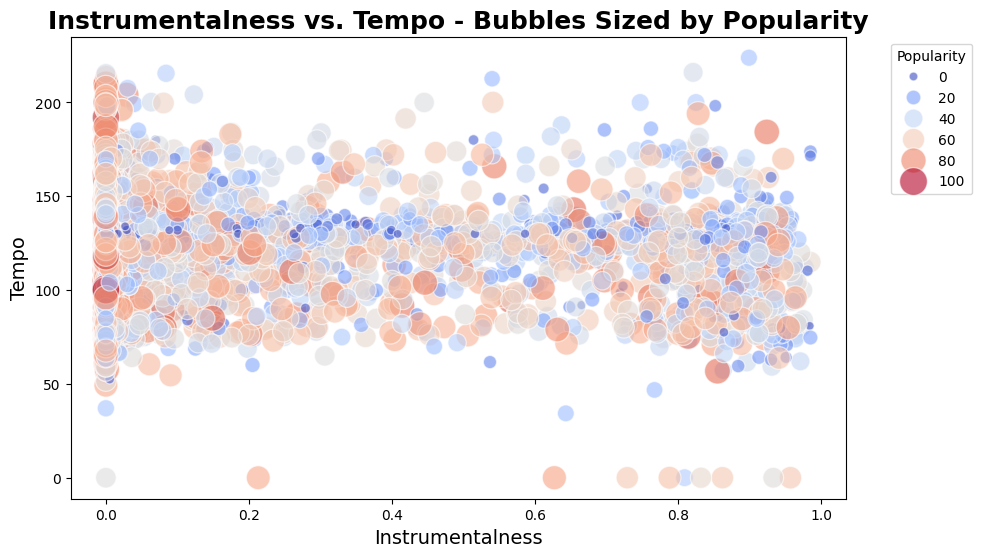

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='instrumentalness', y='tempo', hue='popularity', size='popularity', data=features_df, palette='coolwarm', sizes=(40, 400), alpha=0.6)
plt.title('Instrumentalness vs. Tempo - Bubbles Sized by Popularity', fontsize = 18, weight = 'bold')
plt.xlabel('Instrumentalness', fontsize = 14)
plt.ylabel('Tempo', fontsize = 14)
plt.legend(title='Popularity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Random Forest Model to Get Feature Importance

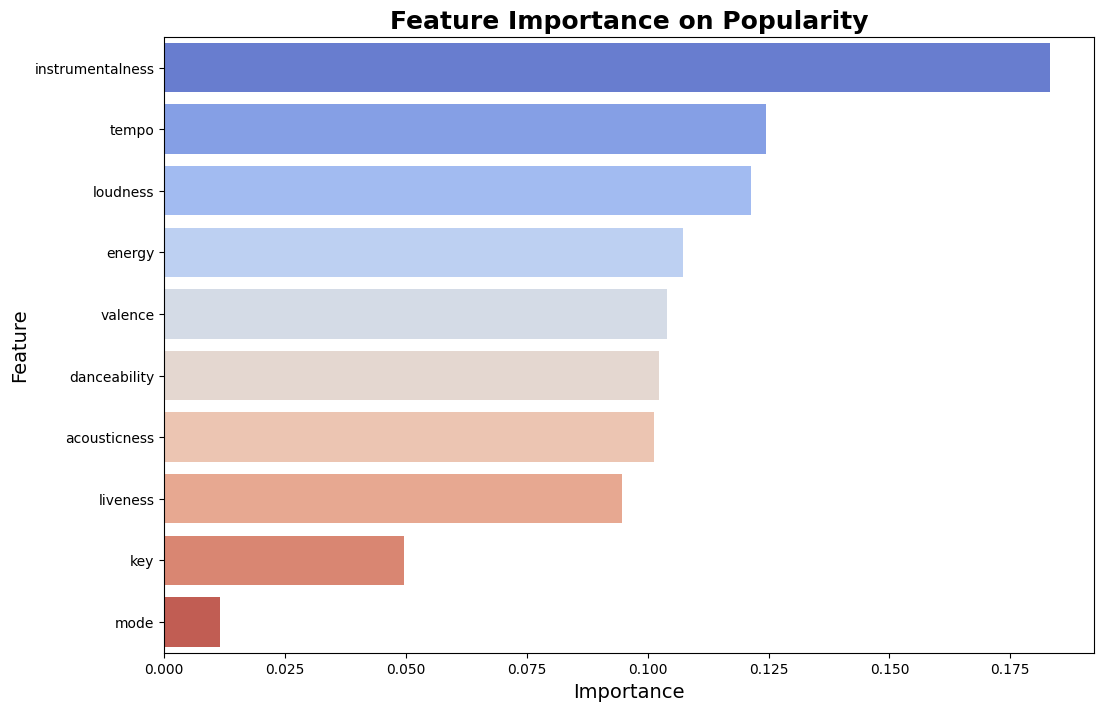

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


features = ['danceability', 'energy', 'key', 'loudness', 'mode',
    'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo']
X = features_df[features]
y = features_df['popularity']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Feature Importance on Popularity', fontsize = 18, weight = 'semibold')
plt.xlabel('Importance', fontsize = 14)
plt.ylabel('Feature', fontsize = 14)
plt.savefig('feature_importance.png', bbox_inches='tight')
plt.show()

# Prepare for Modeling

In [13]:
features_df['rating'] = 1

In [14]:
billboard_features_df['rating'] = 0

In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

features = ['danceability', 'key', 'mode' , 'loudness', 'acousticness',
            'instrumentalness', 'liveness', 'valence',
            'tempo', 'duration_ms', 'time_signature']


scaler = MinMaxScaler()
features_df[features] = scaler.fit_transform(features_df[features])
billboard_features_df[features] = scaler.transform(billboard_features_df[features])

median_popularity = features_df['popularity'].median()
features_df['target'] = (features_df['popularity'] > median_popularity).astype(int)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features_df[features], features_df['target'], test_size=0.2, random_state=42)

In [17]:
y_train.value_counts()

target
0    3279
1    3201
Name: count, dtype: int64

# Baseline Model - Content Based Recommender

In [24]:
similarity_matrix_train = cosine_similarity(X_train, billboard_features_df[features])
similarity_matrix_test = cosine_similarity(X_test, billboard_features_df[features])

most_similar_indices_train = np.argmax(similarity_matrix_train, axis=1)
most_similar_indices_test = np.argmax(similarity_matrix_test, axis=1)

recommended_songs_train = billboard_features_df.iloc[most_similar_indices_train].reset_index(drop=True)
recommended_songs_test = billboard_features_df.iloc[most_similar_indices_test].reset_index(drop=True)




In [25]:
def evaluate_recommendations(recommended_songs, y_true):
    recommended_popularity = recommended_songs['popularity']
    recommended_target = (recommended_popularity > median_popularity).astype(int)
    y_true = y_true.reset_index(drop=True)  # Ensure the indices match
    accuracy = np.mean(recommended_target == y_true)
    return accuracy

train_accuracy = evaluate_recommendations(recommended_songs_train, y_train)
test_accuracy = evaluate_recommendations(recommended_songs_test, y_test)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

recommended_songs = recommended_songs.sort_values('predicted_like', ascending=False).drop_duplicates('id').sort_values('predicted_like', ascending=False)

recommended_songs


Train Accuracy: 0.49398148148148147
Test Accuracy: 0.5061728395061729


,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,rating,predicted_like
1330,77DRzu7ERs0TX3roZcre7Q,euphoria,Kendrick Lamar,94,2024-04-30,0.854769,0.648919,0.008264,0.989520,1.0,0.046451,0.000000,0.053709,0.147855,0.002589,-0.007163,0.16,0,0.596012
5692,0LZy30mVmxqUpdQmaXKXBd,ADIVINO,"Myke Towers, Bad Bunny",90,2024-04-25,0.808482,0.863638,0.082645,0.991301,0.0,0.170692,0.000024,0.077166,0.543524,0.002183,-0.007163,0.16,0,0.591180
6108,4XqBLxDaEdlqkHlSlb1Rzq,Enough (Miami),Cardi B,68,2024-03-15,0.952487,0.799528,0.041322,0.989827,1.0,0.002563,0.000000,0.046459,0.492504,0.002575,-0.007163,0.20,0,0.587361
4144,4dBoAE3FBnVQa9zBqWLMjQ,whatsapp (wassam),Gunna,73,2024-05-03,0.789967,0.730329,0.008264,0.989480,1.0,0.016856,0.000015,0.099557,0.216577,0.002516,-0.007163,0.16,0,0.582127
1320,4xhsWYTOGcal8zt0J161CU,Lovin On Me,Jack Harlow,90,2023-11-10,0.969973,0.562421,0.016529,0.989582,1.0,0.002613,0.000002,0.064052,0.630988,0.001942,-0.007163,0.16,0,0.579810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,7IWcDWOfiooH5hRs9XOVYz,Fresh Out The Slammer,Taylor Swift,88,2024-04-19,0.339439,0.486099,0.074380,0.986513,1.0,0.630283,0.000000,0.082497,0.354020,0.001612,-0.007163,0.16,0,0.384184
5417,18WFFUIsewmA8g31KAeo3e,The Prophecy,Taylor Swift,88,2024-04-19,0.433042,0.528840,0.082645,0.985853,1.0,0.833311,0.000003,0.292544,0.557060,0.003107,-0.007163,0.16,0,0.379865
932,1kcwpPDQnqEqmezzXdJTCP,imgonnagetyouback,Taylor Swift,89,2024-04-19,0.806425,0.392478,0.074380,0.986461,1.0,0.614122,0.000000,0.232835,0.156185,0.002035,-0.007163,0.16,0,0.377880
2895,1kbEbBdEgQdQeLXCJh28pJ,Down Bad,Taylor Swift,91,2024-04-19,0.556474,0.367037,0.090909,0.985816,1.0,0.565637,0.000001,0.065011,0.174927,0.002955,-0.007163,0.16,0,0.371274


In [27]:
features_df.head()

,id,title,all_artists,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,rating,target
0,597vP6rhNkEpSHpCyriFnf,Flyin Baby,JACK MARLOW,39,2023-04-21,0.836032,0.576,0.818182,0.749155,0.0,0.016561,0.758376,0.123764,0.682977,0.580631,0.047358,0.8,1,0
1,3cEvwcgCxyMKIKFp37LGwS,Soundboy Surrender - Crossy Remix - Mixed,"Kartoon, Crossy",55,2022-07-22,0.536437,0.856,0.909091,0.923483,0.0,0.017665,0.356345,0.238056,0.731906,0.390927,0.010361,0.8,1,1
2,5cGZN0P1QnSfhCFBCHtp2N,Peach,"salute, Sammy Virji",55,2023-03-31,0.876518,0.668,0.090909,0.810408,1.0,0.011541,0.902538,0.230848,0.669725,0.603096,0.090894,0.8,1,1
3,4wP6mzWZC94dYmU6OYeljf,Maria Maria,TECH IT DEEP,69,2023-02-08,0.731781,0.685,0.000000,0.825091,1.0,0.099594,0.000610,0.237026,0.393476,0.571728,0.038783,0.8,1,1
4,51oib6a2dRu2f6x8OMMphQ,Réveiller (feat. manon),"Shaolin Cowboy, manon",52,2021-03-26,0.852227,0.418,0.727273,0.764549,0.0,0.768071,0.023147,0.106260,0.456677,0.571826,0.075127,0.8,1,0


# Neural Network Recommender and Evaluation

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_dim=len(features), kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
162/162 [==============================] - 2s 4ms/step - loss: 0.7965 - accuracy: 0.5156 - val_loss: 0.7385 - val_accuracy: 0.5270
Epoch 2/50
162/162 [==============================] - 1s 3ms/step - loss: 0.7136 - accuracy: 0.5473 - val_loss: 0.6928 - val_accuracy: 0.5725
Epoch 3/50
162/162 [==============================] - 1s 3ms/step - loss: 0.6877 - accuracy: 0.5702 - val_loss: 0.6762 - val_accuracy: 0.5887
Epoch 4/50
162/162 [==============================] - 1s 3ms/step - loss: 0.6794 - accuracy: 0.5770 - val_loss: 0.6715 - val_accuracy: 0.6026
Epoch 5/50
162/162 [==============================] - 0s 3ms/step - loss: 0.6739 - accuracy: 0.5878 - val_loss: 0.6707 - val_accuracy: 0.6034
Epoch 6/50
162/162 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.5864 - val_loss: 0.6681 - val_accuracy: 0.5972
Epoch 7/50
162/162 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.5860 - val_loss: 0.6671 - val_accuracy: 0.6065
Epoch 

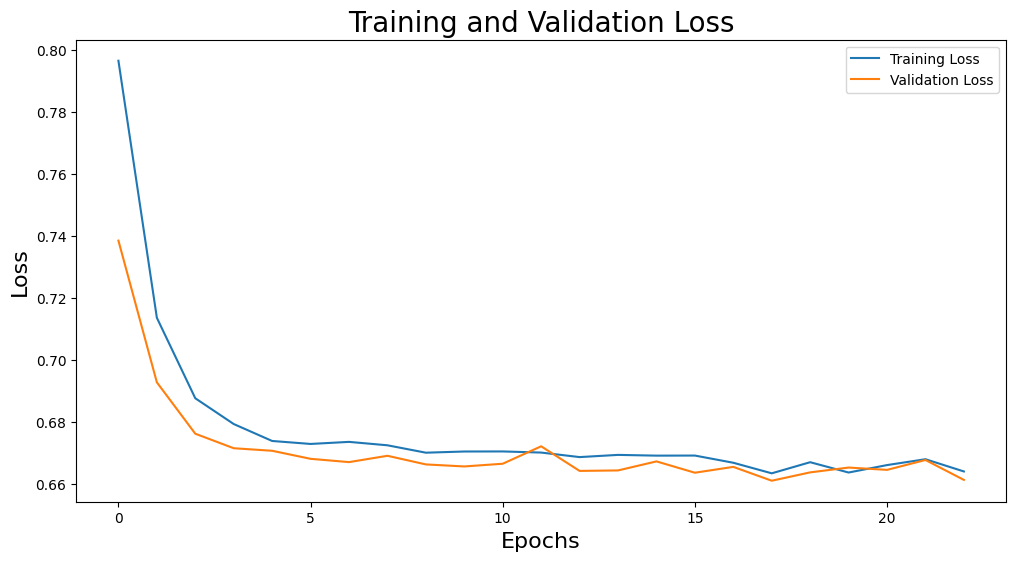

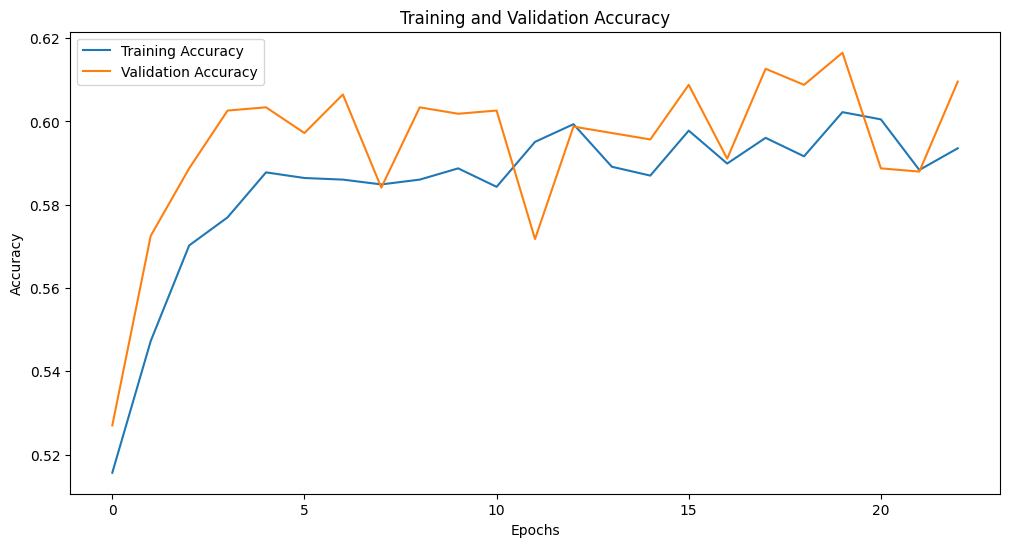

Test Loss: 0.6702
Test Accuracy: 0.5981


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs', size = 16)
plt.ylabel('Loss', size = 16)
plt.title('Training and Validation Loss', size = 20)
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


In [ ]:
billboard_features_df['predicted_like'] = model.predict(billboard_features_df[features])
top_recommendations = billboard_features_df.sort_values(by='predicted_like', ascending=False).head(10)
top_recommendations[['title', 'all_artists', 'predicted_like']]

4/4 [==============================] - 0s 5ms/step


,title,all_artists,predicted_like
43,Never Lose Me,Flo Milli,0.677871
26,Type Shit,"Future, Metro Boomin, Travis Scott, Playboi Carti",0.676404
96,"One Of The Girls (with JENNIE, Lily Rose Depp)","The Weeknd, JENNIE, Lily-Rose Depp",0.674075
71,Bandit,Don Toliver,0.671483
2,euphoria,Kendrick Lamar,0.670361
19,I Remember Everything (feat. Kacey Musgraves),"Zach Bryan, Kacey Musgraves",0.669945
84,Outskirts,Sam Hunt,0.668655
15,Down Bad,Taylor Swift,0.668554
8,Beautiful Things,Benson Boone,0.667966
16,Push Ups,Drake,0.665889


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose = 0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")

Test Loss: 0.6702
Test Accuracy: 0.5981
Train Accuracy: 0.6083
